# Foundation of probability theory

At some point we have all thought intuitively about probability.
Maybe you've weighed the odds of an extra scoop of ice cream's impact on your future chances of hypertension.
It is possible you've thought about the chance a vaccine will protect against a future infection, or maybe you've considered the likelihood flu season will start this week, or if it is more likely it starts a few weeks from now. 
We all have some experience with probability, thinking about an event's odds, chance, or likelihood to occur. 
But it is difficult to imagine giving a rigorous definition of the probability of an event.

Our goals for this week will be to do just that. 
We will use mathematics to rigorously define probability and explore how a deeper understanding of probability translates to a clearer understanding of how to run experiments, interact with data, and interpret outcomes.

We will cover:
* A Frequentist definition of probability
* The definition of an outcome and an event
* Set Theory and operators on sets
* Kolmorogov's axioms of probability
* The Addition rule and general addition rule of probability

## A Definition of probability

We can define the probability of an event as the proportion of times we observe that event over an infinite number of observations.
There is a lot to unpack in this definition. 

The above definition relates probabilities with proportions, and we know proportions are non-negative (positive or zero) and range from as small as 0 to as large as 1.
We also have to understand what it means to compute a proportion over an infinite number of observations. 
Let's handle (as best any human can) infinity first.

To gain some intuition, we can simulate the proportion of heads observed as we flip a fair coin over and over.

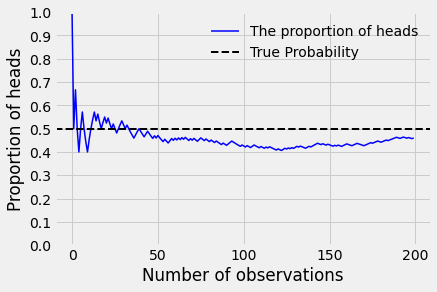

In [25]:
import warnings
warnings.filterwarnings("ignore")

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
widgets.interact_manual.opts['manual_name'] = 'Run Experiment'

probOfHeads = 0.50

def plotTheRunningProb(runProb,truProb):
    plt.style.use('fivethirtyeight')
    fig,ax = plt.subplots() # create a blank figure region
    ax.plot(runProb,color='blue',lw=1.5,label="The proportion of heads")
    ax.set_xlabel("Number of observations")
    ax.set_ylabel("Proportion of heads")
    
    ax.set_ylim(0,1)
    ax.tick_params(which='both',direction='in')
    ax.set_yticks(np.arange(0,1+0.1,0.1))
    
    ax.axhline(truProb, color="black",linestyle="--",linewidth=2,label="True Probability")
    
    ax.legend(frameon=False)
    
    plt.show()
    
def flipCoinXtimes(prob,numberOfFlips):
    import numpy as np
    oneForHeadsZeroForTails = np.random.uniform(size=int(numberOfFlips)) < prob
    runningProbability = np.cumsum(oneForHeadsZeroForTails)/ np.arange(1,numberOfFlips+1)
    
    plotTheRunningProb(runningProbability,prob)

flipCoinXtimes(0.50,200)

### Experiment with different Probabilities and Number of Flips

In [26]:
interact_manual(flipCoinXtimes
                ,prob=widgets.FloatSlider(min=0.05, max=0.95, step=0.05)
                ,numberOfFlips = widgets.FloatSlider(min=200, max=2000, step=10))

interactive(children=(FloatSlider(value=0.05, description='prob', max=0.95, min=0.05, step=0.05), FloatSlider(…

<function __main__.flipCoinXtimes(prob, numberOfFlips)>

## Infinity

In the above figure, we computed the proportion of heads for 1, 2, 3, ..., N flips (observations).
We can see that as the number of observations increases the proportion approaches a single value.  
So one way to understand our definition, a proportion over an *infinite* number of observations, is to say that as the number of observations grows the proportion will approach one value.  

Another way to think about a proportion that approaches a single value when collecting an infinite number of observations is to play a game.
There are two players in this game. 
Player 1 asks "Can you define a number of observations after which the proportion is within $\epsilon$ of the true probability"?
If Player 2 can provide that number of observations then the computed proportion can be made arbitrarily close to the truth probability. 
In mathematical notation we define this as

If there is a value $P$ such that for every choice of $\epsilon$ there exists a $N$ such that

\begin{align}
    | \text{Proportion} - P | < \epsilon
\end{align}

whenever we collect $n>N$ observations then the value $P$ is the probability.

The smaller the value of $\epsilon$ the more observations you need to collect or the larger $N$ needs to be.
But the number player 2 provides, the $N$, is finite.
This is another way we can think about infinity---if you can specify a number of observations that guarantees the proportion you compute is arbitrarily close to the true probability.

## Why a Proportion?

We handled infinity but there is another more subtle part of our definition of probability: the use of a proportion.
To understand why a proportion estimates the true probability of an event we need (i)an understanding of set theory and (ii) what we mean when we say "event". 

## Sets and set operations

A **set** is an unordered, unique collections of items (sometimes called elements).
Sets are denoted with capital letters and the items, or elements, of a set are separated by commas and enclosed in curly brackets

For example,
\begin{align}
    S = \{s_{1},s_{2},s_{3},\cdots,s_{n}\}
\end{align}
is a set $S$ with items: $s_{1}$,$s_{2}$,$s_{3}$ up to $s_{n}$.

There are several different ways two sets can interact with one another called **set operations**.
below we'll explore three operators.
For all the operators below, we will use as an example two sets $A$ and $B$ where

\begin{align}
    A &= \{ 1,2,3,4,5,6 \}\\
    B &= \{ 4,5,6,8\}
\end{align}

### An element of 

We write $x \in Y$ when the item (element) $x$ is contained in the set $Y$, and $x \notin Y$ when the item $x$ is not in the set $Y$.
For example, $3 \in A$ but $10 \notin A$.
The item $3$ is contained in the set of A (called a member of A) but 10 is not a member of A.

### Union

The union of two sets, $A$ and $B$, are all items (elements) that are either in set $A$ **or** in set $B$.
The union is itself a set. 
We denote the union of $A$ and $B$ as $A \cup B$.
The definition of union can be written in mathematical notation as 

\begin{align}
    x \in A \cup B \text{ if } x \in A \text{ or } x \in B 
\end{align}

and is read "x is an item in the union of A and B if x is in A or x is in B".

For example,

\begin{align}
    A \cup B = \{1,2,3,4,5,6,8\}
\end{align}

### Intersection

The intersection of two sets, $A$ and $B$, are all items (elements) that are in set $A$ **and** in set $B$.
The intersection is itself a set. 
We denote the intersection of $A$ and $B$ as $A \cap B$.
The definition of intersection can be written in mathematical notation as 

\begin{align}
    x \in A \cap B \text{ if } x \in A \text{ or } x \in B 
\end{align}

and is read "x is an item in the intersection of A and B if x is in A and x is in B".

For example,
\begin{align}
    A \cap B = \{4,5,6\}
\end{align}

### Complement

The complement of a single set $A$ is all items that are not a member of $A$. 
The complement is a set itself and denoted $A^{c}$.
The definition of complement can be written in mathematical notation as 

\begin{align}
    x \in A^{c} \text{ if } x \notin A. 
\end{align}

But this definition is a bit odd.
How do we know which are all the items to consider not in A?

### The universal set

The Universal set (denoted $U$) is defined as the set of all items (elements).  
For our example we'll define 

\begin{align}
    U = \{0,1,2,3,4,5,6,7,8,9,10\}
\end{align}

Now it makes more sense to talk about the complement of $A$. 
The complement is all the items in the universal set $U$ that are not in the set $A$.

\begin{align}
    A^{c} = \{0,7,8,9,10\}
\end{align}

Set theory will give us a way to define what we mean by a probabilistic **event**.

## Outcomes and events

An **outcome** is a result (list of observations) of an experiment.
As an example, suppose the experiment we run is to flip a coin 3 times. 
One possible outcome is we see, in order, heads, heads, tails. 

It is a convention to enclose the results (observations) of an experiment in round brackets. 
So the outcome above could be written (heads, heads, tails).

The universal set ($U$) of all possible outcomes of an experiment is called the **Sample space** (sometimes called the possibility space or potential states of nature).
And an **event** is defined as a set of potential outcomes. 

Let's look back at our coin experiment above and denote heads as "H" and tails as "T". 
The universal set of all outcomes called the sample space, all results of 3 coin flips, is the set

\begin{align}
    S  = \{ (H,H,H), (T,H,H),(H,T,H),(H,H,T),(T,T,H),(T,H,T),(H,T,T),(TTT) \}
\end{align}

The sample space has $8$ items, $8$ possible outcomes of this experiment. 

We can define an event $E$ in words as "We see two heads".
The event is the set of outcomes that contains two heads or 

\begin{align}
    E = \{ (T,H,H),(H,T,H),(H,H,T) \}.
\end{align}
There are three possible outcomes in this **event**. 

### Disjoin events

We say that two events $E_{1}$ and $E_{2}$ are disjoint or mutually exclusive if their intersection is empty.
In other words, two events are disjoint if

\begin{align}
    E_{1} \cap E_{2} = \emptyset
\end{align}

where $\emptyset$ is the set that contains no items $\{\}$ called "the empty set".

## A set theoretic definition of probability

The probability of an event $E$ (a set) is the number of outcomes in the event divided by the total number of outcomes in the sample space.

We use the letter $p$ for probability and write
\begin{align}
    p(E) = \frac{\#E}{\#S}
\end{align}

In our above example, the probability of two heads equals $p(E) = \frac{3}{8}$.

We defined an event as a set of outcomes, possible results from our experiment, and the proportion is a natural way to define the probability of an event as the fraction of outcomes that could occur.

## Kolmogorov's Axioms

Now that we understand the definition of probability as the proportion of times we observe an event over an infinite number of observations, we can add more structure to our probability space. 
The basic requirements of any probability space are called **Kolmogorov's Axioms**.

The Kolmogorov Axioms are:
### All probabilities must be non-negative
For any event $E$, $p(E) \ge 0$.
This makes intuitive sense and follows from our definition: probability is related to the proportion of times we observe an event.

### The probability of "something" happening is 1
For any sample space $S$, $p(S) = 1$.
This axiom says that the probability of the sample space, the set of all possible future outcomes, is one. 
Something must happen. 

### An event that is made up of disjoint events can be computed by adding up the individual probabilities

This is commonly called the **addition rule**.
Suppose out experiment is flipping three coins and we want to compute the probability of observing either one head or two heads out of the three flips $(E_{\text{1 or 2 heads}})$. 
We can do this the traditional way by listing all possible outcomes and counting the number of outcomes with one head or with two heads. 
But the addition rule gives us another way to compute this event. 
We can define two events: (i) E_{1} the event that we observe one head and (ii) the event that we observe two heads.
These events are disjoint---observing only one head out of three flips does not include the possibility of observing two heads and vice versa.

The addition rule says

\begin{align}
    p(E_{\text{1 or 2 heads}}) = p(E_{1}) + p(E_{2})
\end{align}

We can verify this for our experiment. 

The sample space is 
\begin{align}
    S  = \{ (H,H,H), (T,H,H),(H,T,H),(H,H,T),(T,T,H),(T,H,T),(H,T,T),(TTT) \}
\end{align}

and the three events we considered are
\begin{align}
    E_{1}  &= \{ (T,T,H),(T,H,T),(H,T,T)\}\\
    E_{2}  &= \{ (T,H,H),(H,T,H),(H,H,T)\}\\
    E_{\text{1 or 2 heads}} &= \{ (T,T,H),(T,H,T),(H,T,T),(T,H,H),(H,T,H),(H,H,T)\}
\end{align}

The individual probabilities are
\begin{align}
    p(E_{1})  &= \frac{3}{8} \\
    p(E_{2})  &= \frac{3}{8} \\
    p(E_{\text{1 or 2 heads}}) &= \frac{6}{8}
\end{align}

and the addition rule says

\begin{align}
    p(E_{\text{1 or 2 heads}}) = p(E_{1}) + p(E_{2}) = \frac{3}{8} + \frac{3}{8} = \frac{6}{8}
\end{align}



### General addition rule

The **addition rule** works because we are counting up outcomes that do not appear more than once in any event.
But what if we want a more flexible addition rule that can handle cases when events are **not** disjoint.

The general addition rule applied to all events, not just those that are disjoint. 
The **General addition rule** states:
For two events $A$ and $B$ the probability of either event is 

\begin{align}
    p(A \cup B) = p(A) + p(B) - p(A \cap B)
\end{align}

One way to think about the general addition rule is to count up all the outcomes in A, count all the outcomes in B, and then subtract all the outcomes in both A and B because we double-counted those outcomes. 
A diagram of this process can help.

![General Addition Rule](GAR.jpeg)



The sample space $S$ has 25 outcomes, represented as circles.
The event $A$ contains $8$ outcomes. 
The event $B$ contains $7$ outcomes. 

To compute the probability of $A$ and of $B$ we can count the number of outcomes in each event and divide by the number of items in the sample space.

\begin{align}
    p(A) &= \frac{8}{25}\\
    p(B) &= \frac{7}{25}
\end{align}

To compute the probability of either event $A$ or event $B$ happening, we could count the number of outcomes in $A$, then count the number of outcomes in event $B$.

\begin{align}
    \#E(A \cup B) = \#E(A) + \#E(B)
\end{align}

But $A$ and $B$ have $3$ outcomes in common.  
When I count the number of outcomes that occur in both $A$ and $B$, we counted these $3$ outcomes twice.
So then 

\begin{align}
    \#E(A \cup B) = \#E(A) + \#E(B) - \#E(A \cap B) 
\end{align}

and the probability is 

\begin{align}
    p(A \cup B) = p(A) + p(B) - p(A \cap B) 
\end{align}



## Probability distribution
A probability distribution is the set of all outcomes and their associated probabilities. 
